In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = np.random.randn(1000)

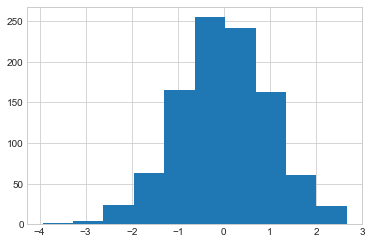

In [4]:
plt.hist(data);

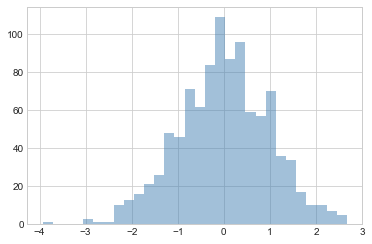

In [8]:
plt.hist(data, bins = 30, alpha = 0.5,
        histtype = 'stepfilled', color = 'steelblue',
        edgecolor = 'none');

(array([ 1.,  0.,  2.,  2.,  4.,  7.,  7., 12., 14., 17., 19., 28., 28.,
        42., 36., 61., 66., 54., 71., 65., 60., 52., 70., 52., 46., 35.,
        33., 29., 24., 21., 17.,  9.,  6.,  4.,  1.,  2.,  2.,  0.,  0.,
         1.]),
 array([-3.46862763, -3.13862534, -2.80862305, -2.47862077, -2.14861848,
        -1.81861619, -1.48861391, -1.15861162, -0.82860933, -0.49860705,
        -0.16860476,  0.16139753,  0.49139981,  0.8214021 ,  1.15140439,
         1.48140667,  1.81140896,  2.14141125,  2.47141353,  2.80141582,
         3.13141811,  3.46142039,  3.79142268,  4.12142497,  4.45142725,
         4.78142954,  5.11143183,  5.44143411,  5.7714364 ,  6.10143869,
         6.43144097,  6.76144326,  7.09144555,  7.42144783,  7.75145012,
         8.08145241,  8.41145469,  8.74145698,  9.07145927,  9.40146155,
         9.73146384]),
 <a list of 1 Patch objects>)

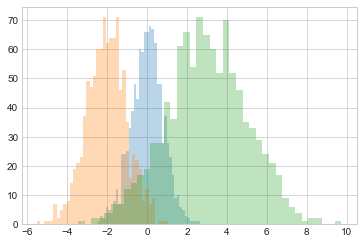

In [9]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.3, bins = 40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [11]:
counts, bin_edges = np.histogram(data, bins = 5)
print(counts)

[  5  87 420 405  83]


2D Histogram and Segmentation
------

In [12]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

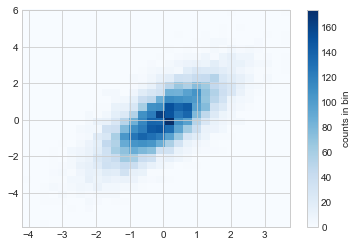

In [13]:
plt.hist2d(x, y, bins = 30, cmap = 'Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

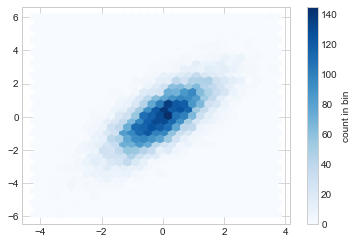

In [14]:
plt.hexbin(x, y, gridsize = 30, cmap = 'Blues')
cb = plt.colorbar(label = 'count in bin')

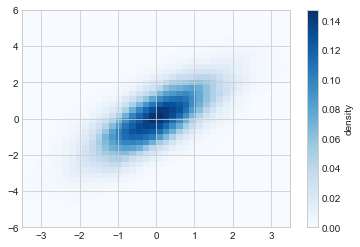

In [16]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
          origin = 'lower', aspect = 'auto',
          extent = [-3.5, 3.5, -6, 6],
          cmap = 'Blues')
cb = plt.colorbar()
cb.set_label("density")